In [1]:
import cirq
import numpy as np
import cirq_qubitization
import cirq_qubitization.testing as cq_testing
from cirq_qubitization.jupyter_tools import display_gate_and_compilation
from typing import *
from pprint import pprint

In [2]:
from cirq_qubitization.quantum_graph.graphviz import \
    PortGraphDrawer, SimplestGraphDrawer
from IPython.display import SVG

In [3]:
from cirq_qubitization.quantum_graph.examples import SplitJoin
bloq = SplitJoin(3)

{BloqInstance(bloq=SplitJoin(nn=3), i=0): 'SplitJoin',
 Wire(binst=LeftDangle, soq=ThruRegister(name='xx', bitsize=3), idx=()): 'xx_G0',
 Wire(binst=RightDangle, soq=ThruRegister(name='xx', bitsize=3), idx=()): 'xx',
 Wire(binst=BloqInstance(bloq=SplitJoin(nn=3), i=0), soq=ThruRegister(name='xx', bitsize=3), idx=()): 'xx_G1'}
digraph my_graph {
rankdir=LR;
xx_G0 [label="Wire(binst=LeftDangl\ne, soq=ThruRegister(\nname='xx',\nbitsize=3), idx=())"];
subgraph cluster_SplitJoin {
label="BloqInstance(bloq=Sp\nlitJoin(nn=3), i=0)";
subgraph cluster_soqs {
xx_G1 [label="Wire(binst=BloqInsta\nnce(bloq=SplitJoin(n\nn=3), i=0), soq=Thru\nRegister(name='xx',\nbitsize=3), idx=())"];
}

}

xx [label="Wire(binst=RightDang\nle, soq=ThruRegister\n(name='xx',\nbitsize=3), idx=())"];
xx_G0:e -> xx_G1:w  [fontsize=10, label="(3,)", labelfloat=True];
xx_G1:e -> xx:w  [fontsize=10, label="(3,)", labelfloat=True];
}



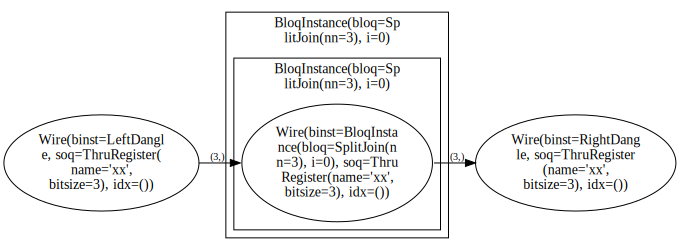

In [4]:
gd = SimplestGraphDrawer(bloq)
pprint(gd.ids)
print(gd.graphviz().to_string())
SVG(gd.graphviz().create_svg())

digraph my_graph {
rankdir=LR;
xx_G0 [label=xx, shape=plaintext];
subgraph cluster_SplitJoin {
label=SplitJoin;
subgraph cluster_soqs {
xx_G1 [label=xx, shape=rect, style=rounded];
}

}

xx [label=xx, shape=plaintext];
xx_G0:e -> xx_G1:w  [fontsize=10, label="(3,)", labelfloat=True];
xx_G1:e -> xx:w  [fontsize=10, label="(3,)", labelfloat=True];
}



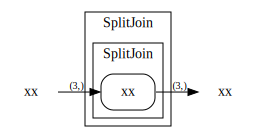

In [5]:
gd = PortGraphDrawer(bloq)
print(gd.graphviz().to_string())
SVG(gd.graphviz().create_svg())

digraph my_graph {
rankdir=LR;
xx [label="Wire(binst=LeftDangl\ne, soq=ThruRegister(\nname='xx',\nbitsize=3), idx=())"];
subgraph cluster_Join {
label="BloqInstance(bloq=Jo\nin(n=3), i=1)";
subgraph cluster_soqs {
jjj [label="Wire(binst=BloqInsta\nnce(bloq=Join(n=3),\ni=1), soq=CustomRegi\nster(name='jjj',\nbitsize=1,\nwireshape=(3,),\nside=<Side.LEFT:\n1>), idx=(0,))"];
jjj_G6 [label="Wire(binst=BloqInsta\nnce(bloq=Join(n=3),\ni=1), soq=CustomRegi\nster(name='jjj',\nbitsize=1,\nwireshape=(3,),\nside=<Side.LEFT:\n1>), idx=(1,))"];
jjj_G1 [label="Wire(binst=BloqInsta\nnce(bloq=Join(n=3),\ni=1), soq=CustomRegi\nster(name='jjj',\nbitsize=1,\nwireshape=(3,),\nside=<Side.LEFT:\n1>), idx=(2,))"];
jjj_G5 [label="Wire(binst=BloqInsta\nnce(bloq=Join(n=3),\ni=1), soq=CustomRegi\nster(name='jjj',\nbitsize=3,\nwireshape=(),\nside=<Side.RIGHT:\n2>), idx=())"];
}

}

subgraph cluster_Split {
label="BloqInstance(bloq=Sp\nlit(n=3), i=0)";
subgraph cluster_soqs {
sss_G2 [label="Wire(binst=BloqInsta\nnc

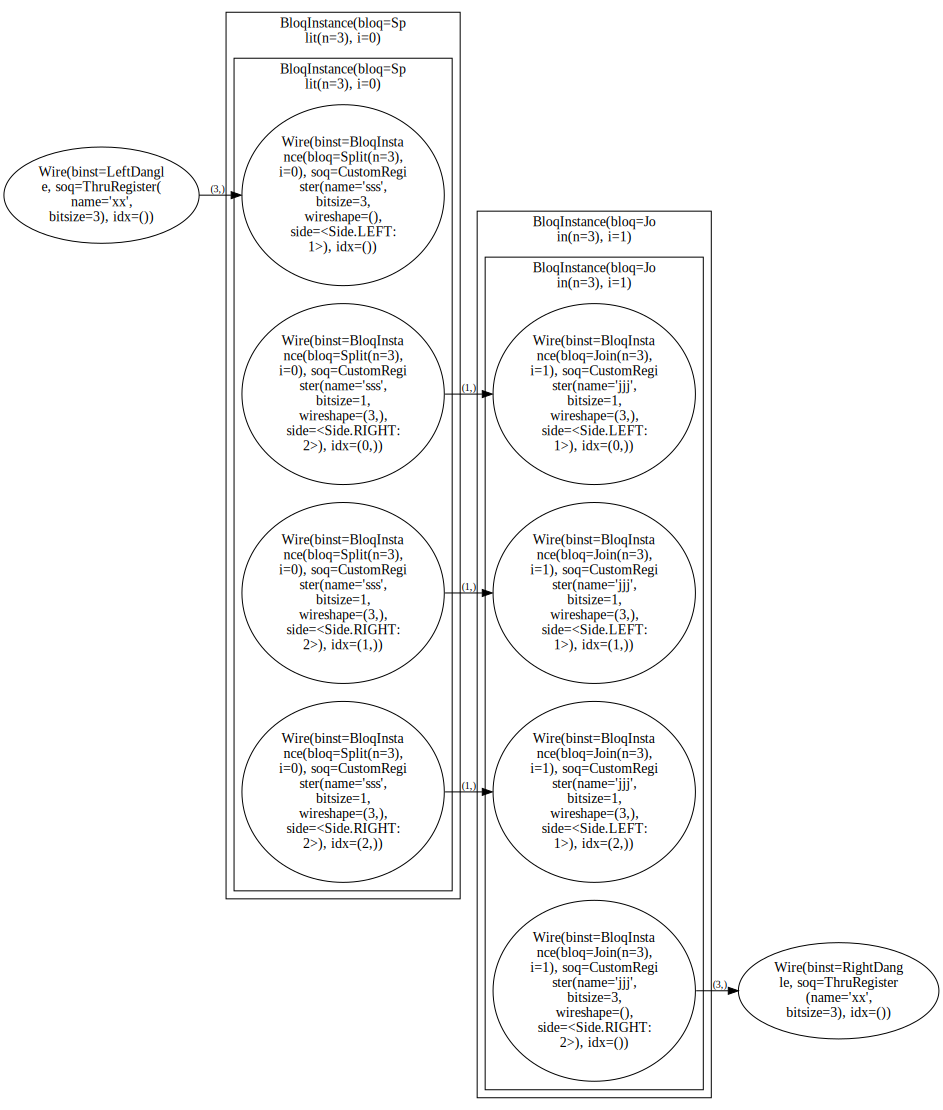

In [8]:
cbloq = bloq.decompose_bloq()
gd = SimplestGraphDrawer(cbloq)
print(gd.graphviz().to_string())
SVG(gd.graphviz().create_svg())

digraph my_graph {
rankdir=LR;
xx [label=xx, shape=plaintext];
subgraph cluster_Join {
label=Join;
subgraph cluster_soqs {
jjj [label="jjj[0]", orientation=-90, shape=house];
jjj_G6 [label="jjj[1]", orientation=-90, shape=house];
jjj_G1 [label="jjj[2]", orientation=-90, shape=house];
jjj_G5 [label=jjj, orientation=90, shape=house];
}

}

subgraph cluster_Split {
label=Split;
subgraph cluster_soqs {
sss_G2 [label=sss, orientation=-90, shape=house];
sss [label="sss[0]", orientation=90, shape=house];
sss_G3 [label="sss[1]", orientation=90, shape=house];
sss_G0 [label="sss[2]", orientation=90, shape=house];
}

}

xx_G4 [label=xx, shape=plaintext];
xx:e -> sss_G2:w  [fontsize=10, label="(3,)", labelfloat=True];
sss:e -> jjj:w  [fontsize=10, label="(1,)", labelfloat=True];
sss_G3:e -> jjj_G6:w  [fontsize=10, label="(1,)", labelfloat=True];
sss_G0:e -> jjj_G1:w  [fontsize=10, label="(1,)", labelfloat=True];
jjj_G5:e -> xx_G4:w  [fontsize=10, label="(3,)", labelfloat=True];
}



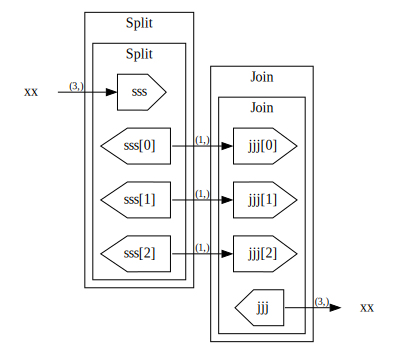

In [9]:
gd = PortGraphDrawer(cbloq)
print(gd.graphviz().to_string())
SVG(gd.graphviz().create_svg())

In [ ]:
display_gate_and_compilation(cq_testing.GateHelper(bloq))

In [ ]:
display_gate_and_compilation(cq_testing.GateHelper(cbloq))